In [524]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
import json

In [51]:
data_file=pd.read_csv('/Users/selinawang/Desktop/python数据分析/project/archive/USvideos.csv')
data_file

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [52]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [53]:
data_file.nunique()

video_id                   6280
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [54]:
data_file["description"] = data_file["description"].fillna(value="")

In [525]:
with open("/Users/selinawang/Desktop/python数据分析/project/archive/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
data_file['category_name'] = data_file['category_id'].map(cat_dict)

In [528]:
data_file['category_name'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [56]:
#EDA 
pd.options.display.float_format = '{:.0f}'.format
data_file.describe()


,category_id,views,likes,dislikes,comment_count
count,40949,40949,40949,40949,40949
mean,20,2360785,74267,3711,8447
std,8,7394114,228885,29030,37430
min,1,549,0,0,0
25%,17,242329,5424,202,614
50%,24,681861,18091,631,1856
75%,25,1823157,55417,1938,5755
max,43,225211923,5613827,1674420,1361580


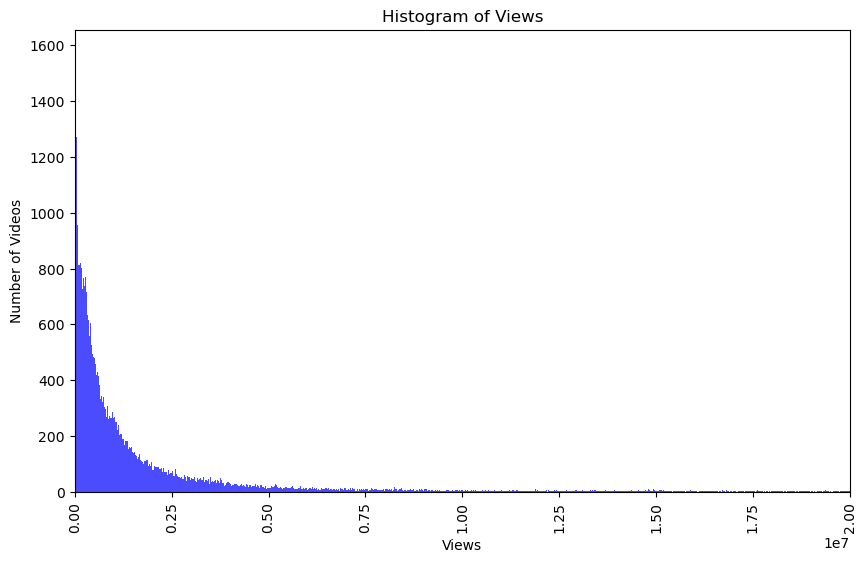

In [57]:
#most of videos are under 1million views
plt.figure(figsize=(10, 6))
plt.hist(data_file["views"], bins=10000, color='b', alpha=0.7)
plt.xlabel('Views')
plt.ylabel('Number of Videos')
plt.title('Histogram of Views')
plt.xlim(0, 2e7)  # Adjust the x-axis limits as needed
plt.xticks(rotation=90)
plt.show()

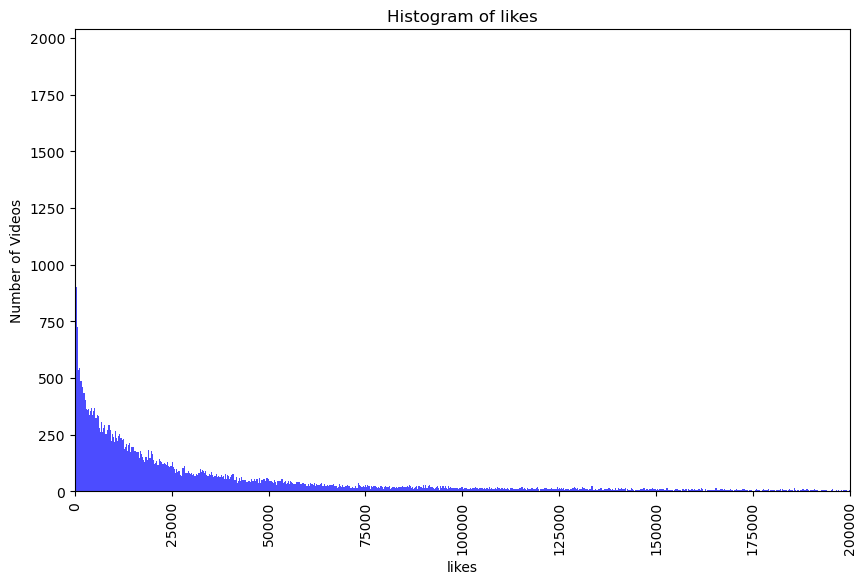

In [58]:
#most videos are under 100K likes
plt.figure(figsize=(10, 6))
plt.hist(data_file["likes"], bins=20000, color='b', alpha=0.7)
plt.xlabel('likes')
plt.ylabel('Number of Videos')
plt.title('Histogram of likes')
plt.xlim(0, 2e5)  # Adjust the x-axis limits as needed
plt.xticks(rotation=90)
plt.show()

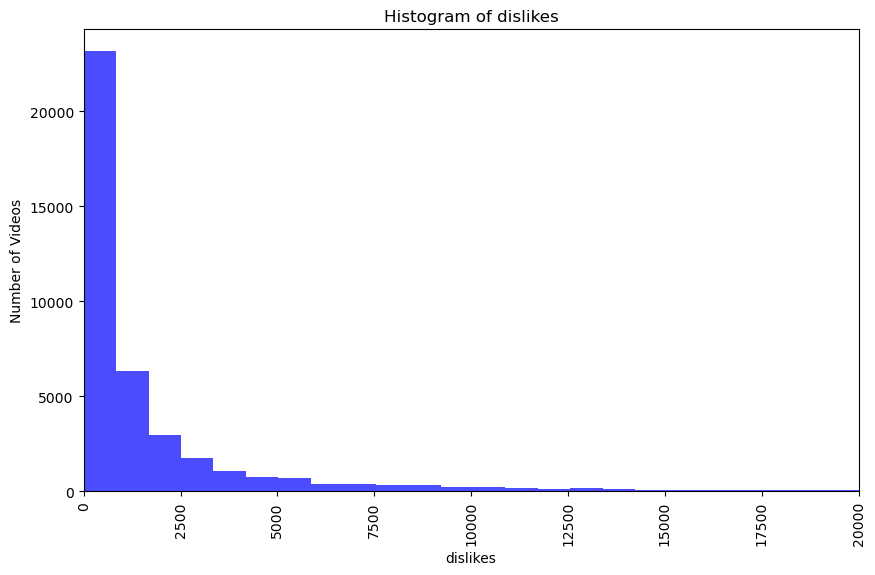

In [59]:
#most of videos are under 10000 dislikes
plt.figure(figsize=(10, 6))
plt.hist(data_file["dislikes"], bins=2000, color='b', alpha=0.7)
plt.xlabel('dislikes')
plt.ylabel('Number of Videos')
plt.title('Histogram of dislikes')
plt.xlim(0, 20000)  
plt.xticks(rotation=90)
plt.show()

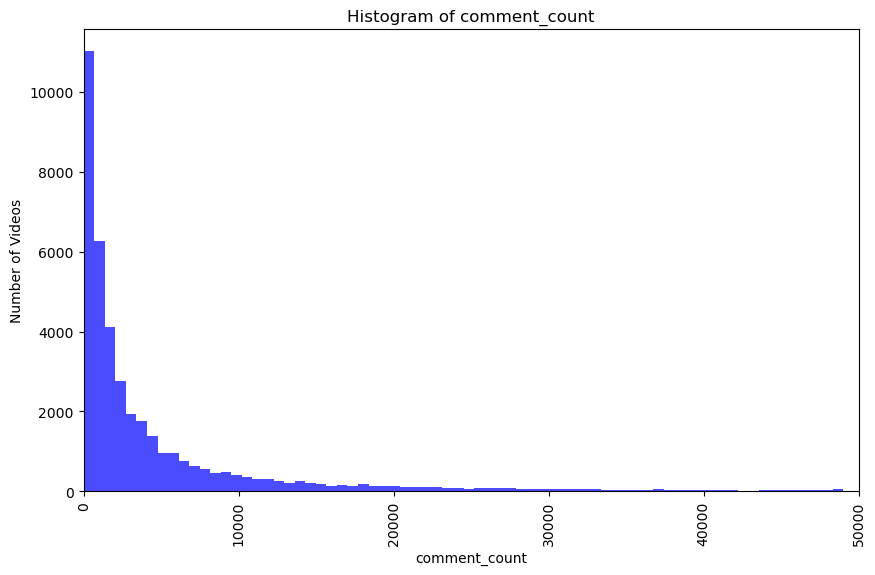

In [60]:
#most of videos are under 10000 comments
plt.figure(figsize=(10, 6))
plt.hist(data_file["comment_count"], bins=2000, color='b', alpha=0.7)
plt.xlabel('comment_count')
plt.ylabel('Number of Videos')
plt.title('Histogram of comment_count')
plt.xlim(0, 50000)  
plt.xticks(rotation=90)
plt.show()

In [61]:
data_file.describe(include = ['O'])
#there are 6280 unique video appeared on the trending list
#some of video change another title while on the trending list
#the title with 'WE MADE OUR MOM CRY...HER DREAM CAME TRUE!' appeared most of time, about 30 times
#on 2017/11/14, there;s the most trending video on that day, about 200 videos


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6280,205,6455,2207,6269,6055,6352,6902
top,#NAME?,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,416,200,30,203,50,1535,30,570


In [79]:
data_file

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [78]:
grouped = data_file.groupby("video_id")
wanted_groups = grouped.filter(lambda x: len(x['title'].unique()) > 1)

wanted_groups
#44&309 with similar video id but different title

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...
92,#NAME?,17.14.11,Animal Adventure Park Giraffe Cam,Animal Adventure Park,15,2017-11-12T00:18:43.000Z,"Giraffe|""Zoo""|""New York""|""giraffe cam""|""Animal...",45455,2282,35,17,https://i.ytimg.com/vi/-OK9i1_YYYc/default.jpg,False,False,False,November 2017 Giraffe Cam Hours\n\nEnjoy your ...
272,ogYum4kWXgk,17.15.11,People Are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",155285,4719,64,207,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...
309,STI2fI7sKMo,17.15.11,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",346924,4657,1838,734,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40745,H7gh2fmdjCU,18.13.06,Calum Scott - What I Miss Most (Official Video),CalumScottVEVO,10,2018-05-16T23:00:00.000Z,"Calum|""Scott""|""What""|""Miss""|""Most""|""Capitol""|""...",9912584,151941,1853,4716,https://i.ytimg.com/vi/H7gh2fmdjCU/default.jpg,False,False,False,Calum’s debut album ‘Only Human’ feat. “You Ar...
40747,#NAME?,18.13.06,We Bought A House,JennaMarbles,23,2018-05-16T22:33:29.000Z,"jenna|""marbles""|""mourey""|""we""|""bought""|""a hous...",3440148,337688,1844,49195,https://i.ytimg.com/vi/-kTWIm7m4Uw/default.jpg,False,False,False,This house means the world to us. The absolut...
40749,#NAME?,18.14.06,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13T07:00:00.000Z,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burton’s all-...
40774,XQSvN2Wd5MQ,18.14.06,International Dunkin Donuts Taste Test,Good Mythical Morning,24,2018-06-11T10:00:02.000Z,"gmm|""good mythical morning""|""rhettandlink""|""rh...",1071182,29145,608,3598,https://i.ytimg.com/vi/XQSvN2Wd5MQ/default.jpg,False,False,False,Can we guess where in the world these Dunkin D...


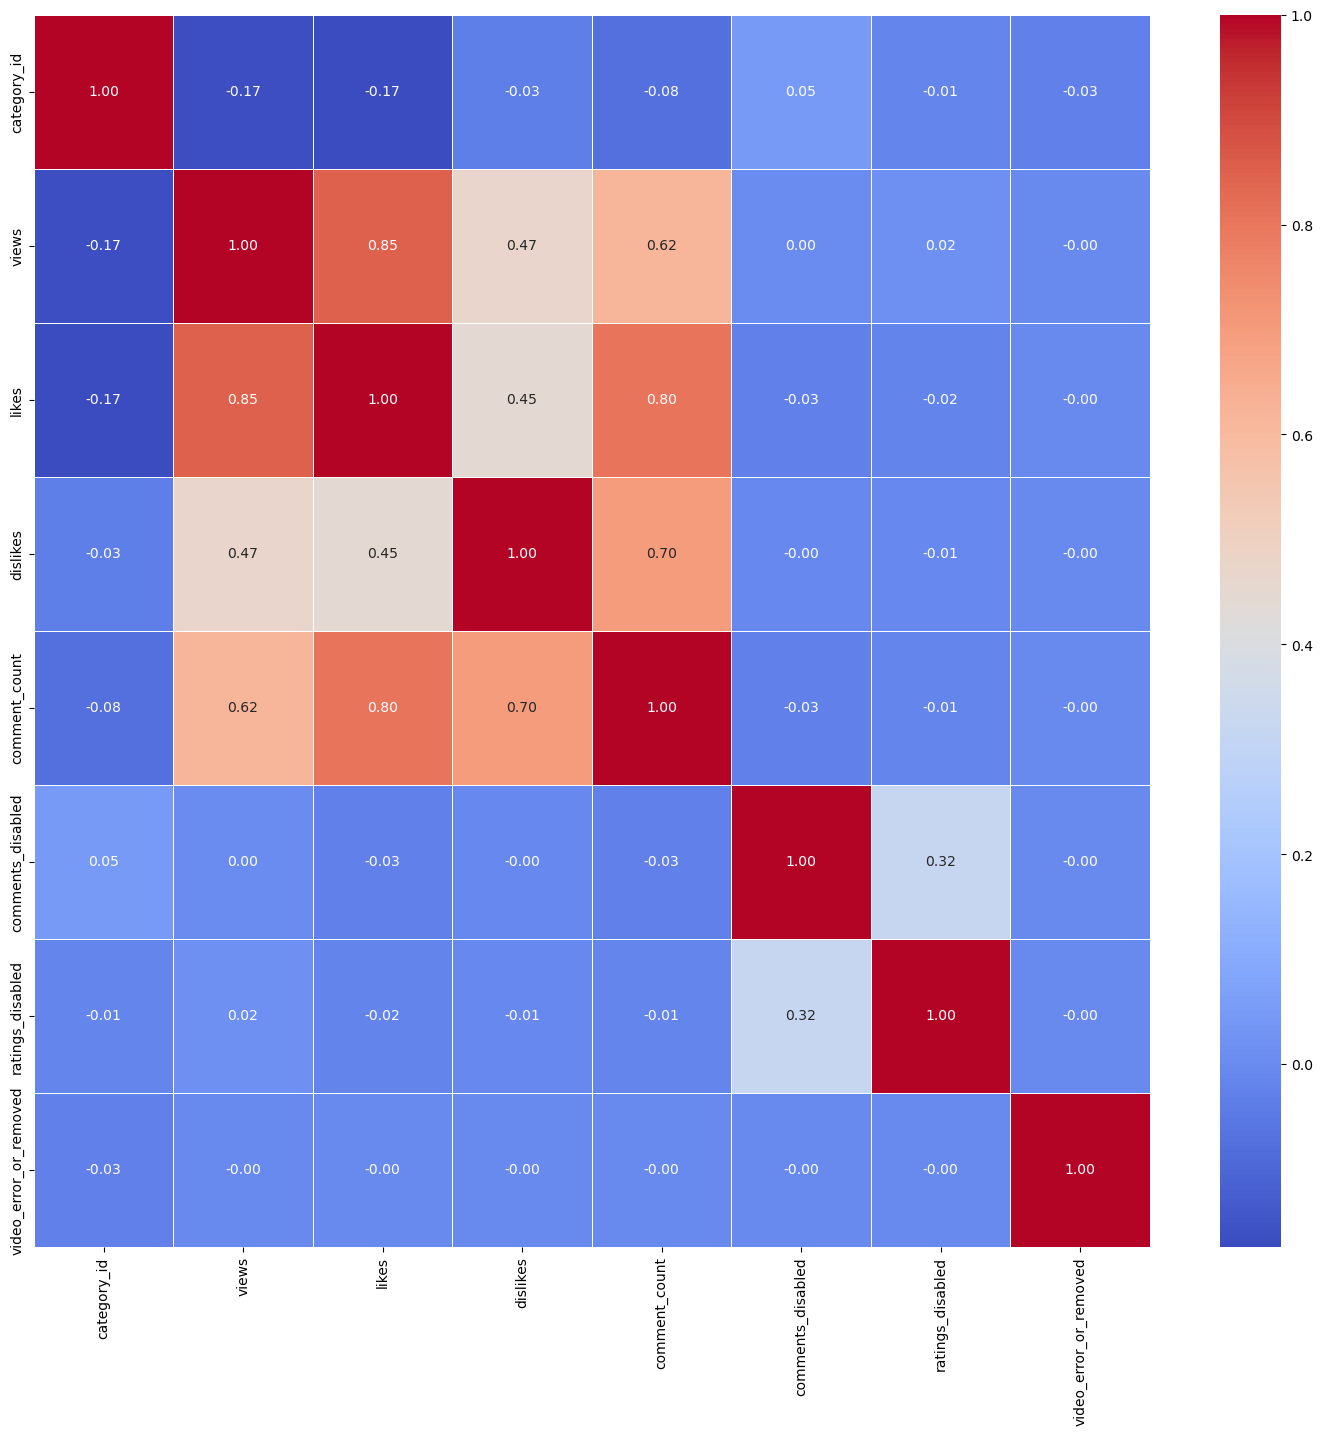

In [81]:
#correlation analysis
corr_matrix = data_file.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()
#views and likes are highly correlated with 0.85
#like and comment count have a high positive correlation 0.80
#between dislikes and comment count correlation is 0.70

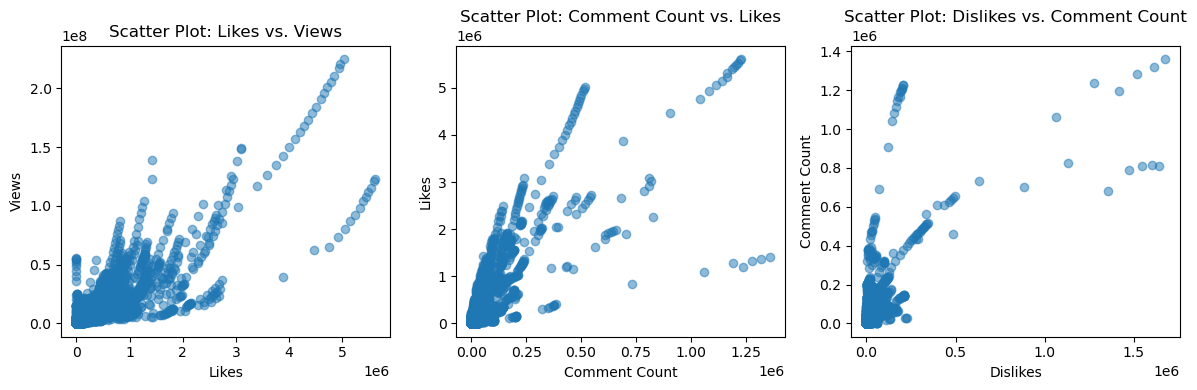

In [82]:
plt.figure(figsize=(12, 4))

# Scatter plot for 'likes' and 'views'
plt.subplot(131)
plt.scatter(data_file['likes'], data_file['views'], alpha=0.5)
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Scatter Plot: Likes vs. Views')

# Scatter plot for 'comment_count' and 'likes'
plt.subplot(132)
plt.scatter(data_file['comment_count'], data_file['likes'], alpha=0.5)
plt.xlabel('Comment Count')
plt.ylabel('Likes')
plt.title('Scatter Plot: Comment Count vs. Likes')

# Scatter plot for 'dislikes' and 'comment_count'
plt.subplot(133)
plt.scatter(data_file['dislikes'], data_file['comment_count'], alpha=0.5)
plt.xlabel('Dislikes')
plt.ylabel('Comment Count')
plt.title('Scatter Plot: Dislikes vs. Comment Count')

plt.tight_layout()
plt.show()
#consider to do log transform

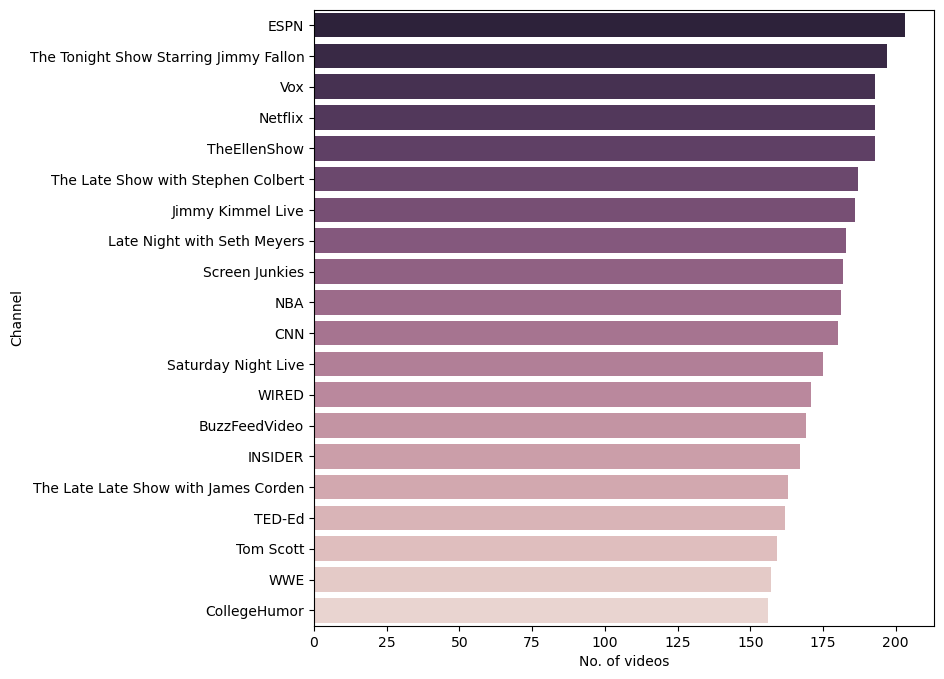

In [83]:
cdf = data_file.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")
#chanel ESPN has most trending videos, around 200 videos

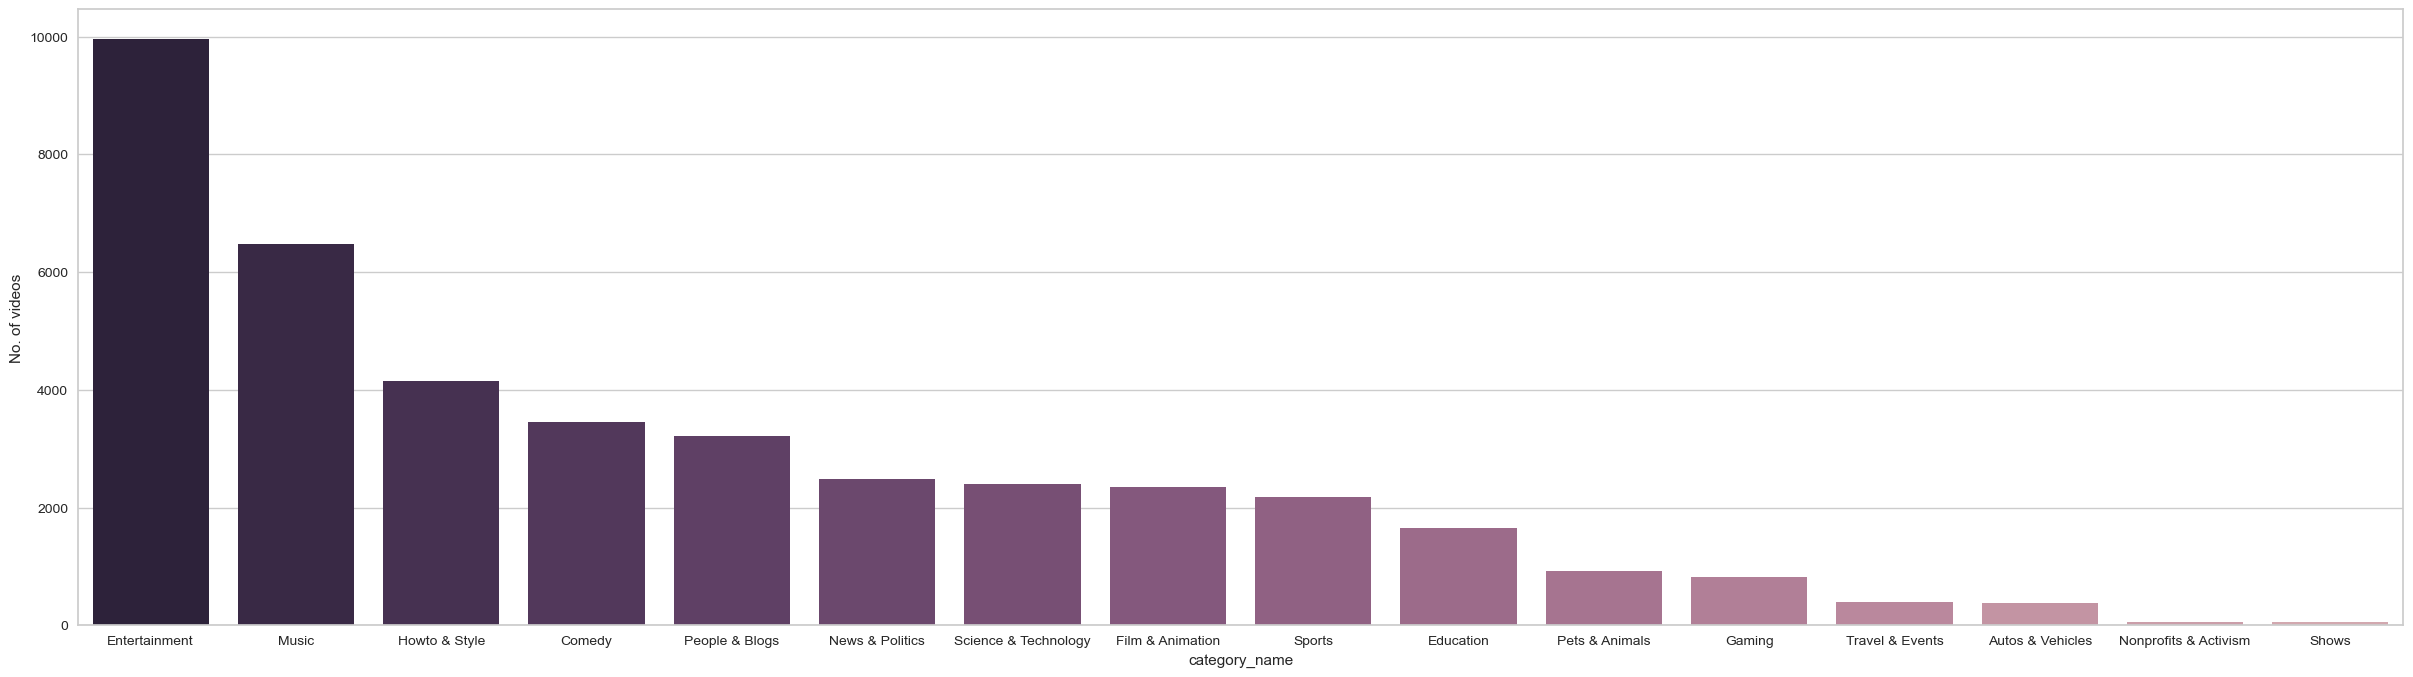

In [534]:
cdf = data_file.groupby("category_name").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(30,8))
_ = sns.barplot(x="category_name", y="video_count", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="category_name", ylabel="No. of videos")
#entertainment has the most trending videos 

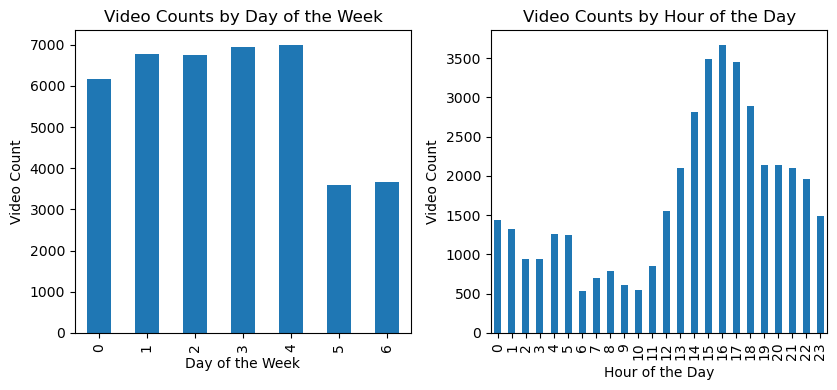

In [94]:
#publish time analysis 
data_file['publish_time'] = pd.to_datetime(data_file['publish_time'])
data_file['year'] = data_file['publish_time'].dt.year
data_file['month'] = data_file['publish_time'].dt.month
data_file['day'] = data_file['publish_time'].dt.day
data_file['hour'] = data_file['publish_time'].dt.hour
data_file['day_of_week'] = data_file['publish_time'].dt.dayofweek  
data_file


video_counts_by_day = data_file.groupby(['day_of_week'])['video_id'].count()
video_counts_by_hour = data_file.groupby(['hour'])['video_id'].count()

plt.figure(figsize=(12, 4))

plt.subplot(132)
video_counts_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Video Count')
plt.title('Video Counts by Day of the Week')

plt.subplot(133)
video_counts_by_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Video Count')
plt.title('Video Counts by Hour of the Day')

plt.tight_layout()
plt.show()


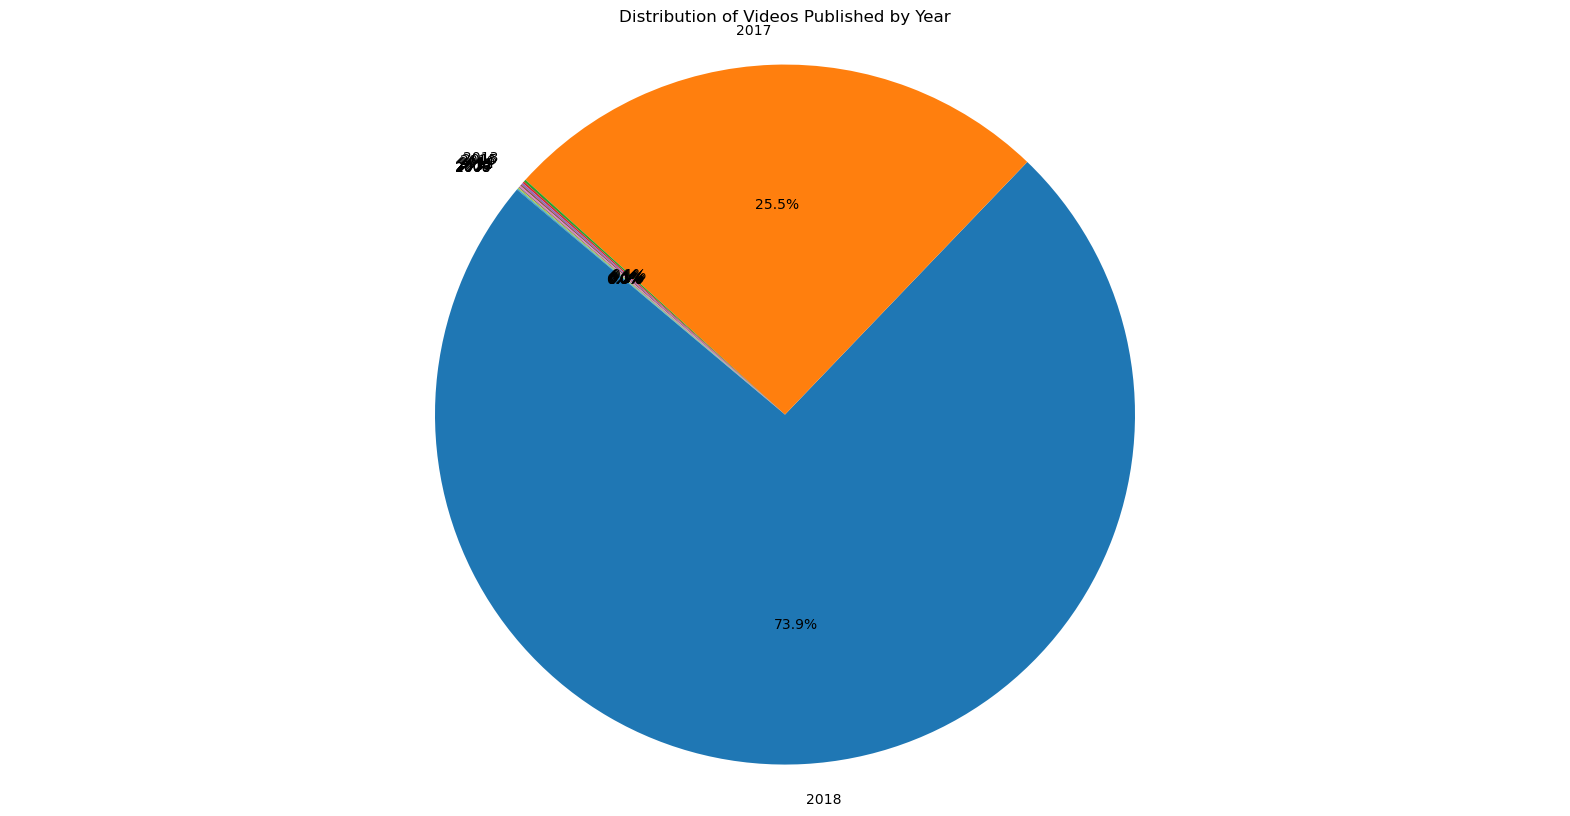

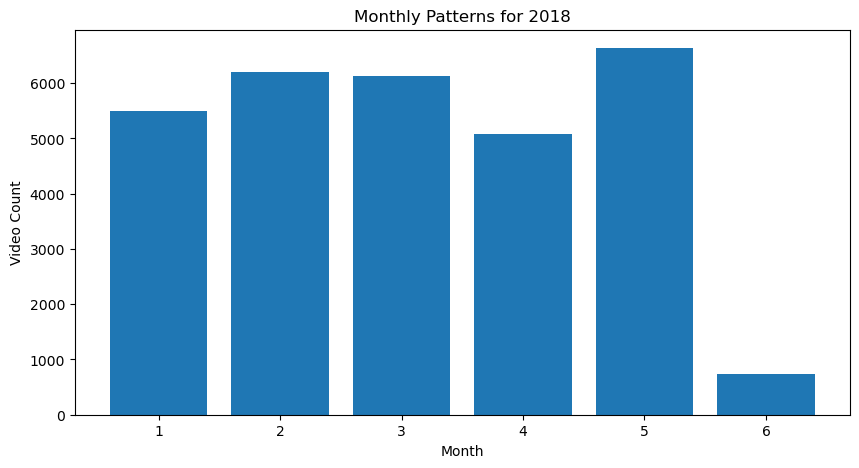

In [103]:
video_counts_by_year = data_file['year'].value_counts()
#analysis year of videos
plt.figure(figsize=(20, 10))
plt.pie(video_counts_by_year, labels=video_counts_by_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Videos Published by Year')
plt.axis('equal')
plt.show()

#select 2018 to dive into month
selected_year_data = data_file[data_file['year'] == 2018]
video_counts_by_month = selected_year_data['month'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(video_counts_by_month.index, video_counts_by_month.values)
plt.xlabel('Month')
plt.ylabel('Video Count')
plt.title(f'Monthly Patterns for 2018')
plt.xticks(video_counts_by_month.index)
plt.show()


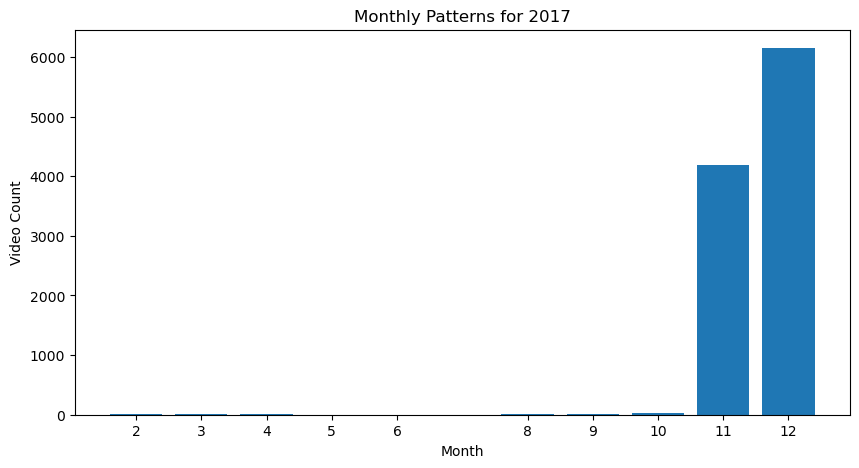

In [102]:
selected_year_data = data_file[data_file['year'] == 2017]
video_counts_by_month = selected_year_data['month'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(video_counts_by_month.index, video_counts_by_month.values)
plt.xlabel('Month')
plt.ylabel('Video Count')
plt.title(f'Monthly Patterns for 2017')
plt.xticks(video_counts_by_month.index)
plt.show()

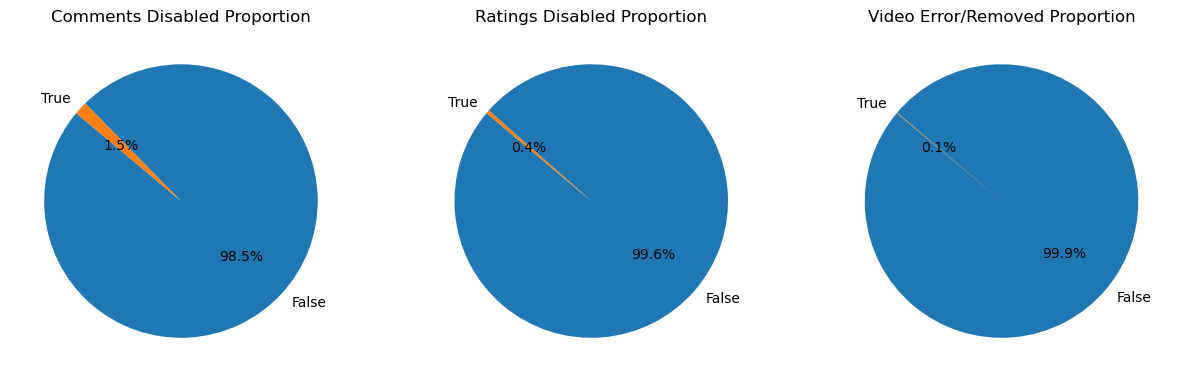

In [107]:
comments_disabled_counts = data_file['comments_disabled'].value_counts()
ratings_disabled_counts = data_file['ratings_disabled'].value_counts()
video_error_removed_counts = data_file['video_error_or_removed'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for 'comments_disabled'
axes[0].pie(comments_disabled_counts, labels=comments_disabled_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Comments Disabled Proportion')

# Pie chart for 'ratings_disabled'
axes[1].pie(ratings_disabled_counts, labels=ratings_disabled_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Ratings Disabled Proportion')

# Pie chart for 'video_error_or_removed'
axes[2].pie(video_error_removed_counts, labels=video_error_removed_counts.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Video Error/Removed Proportion')

plt.show()


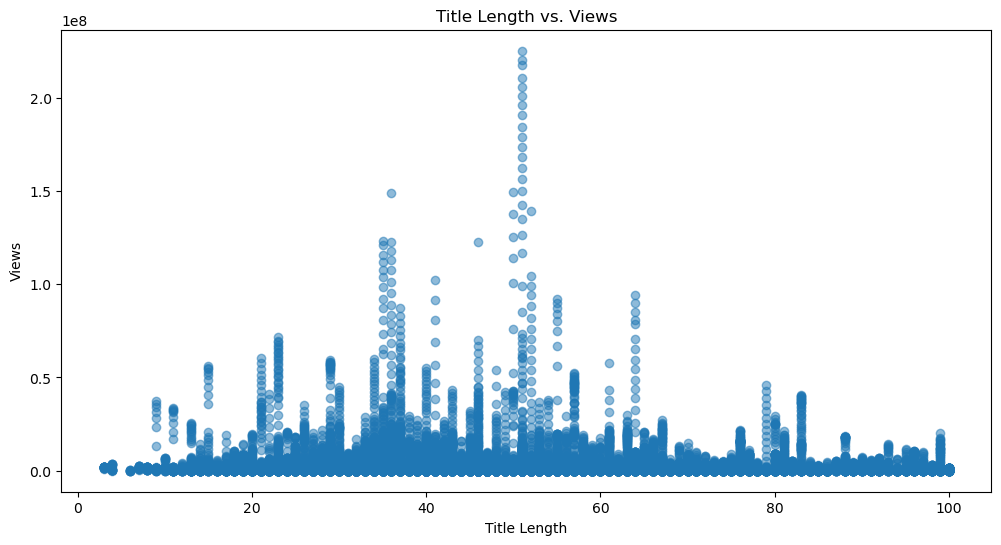

<Figure size 1000x600 with 0 Axes>

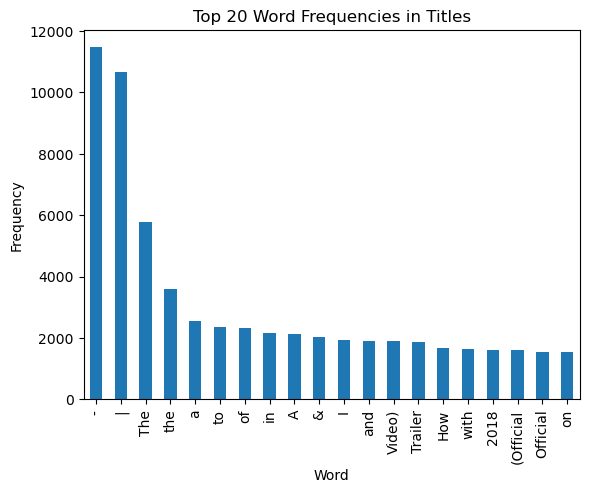

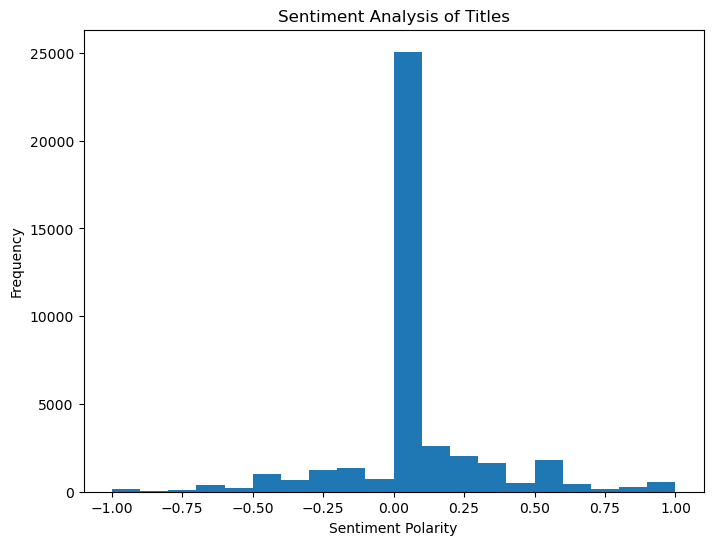

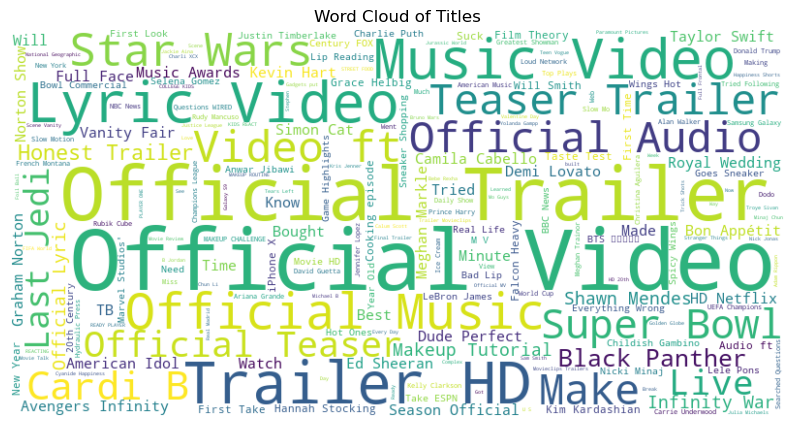

In [111]:
#title analysis 
data_file['title_length'] = data_file['title'].apply(lambda x: len(x))

# Word frequency analysis
word_freq = data_file['title'].str.split(expand=True).stack().value_counts().reset_index()
word_freq.columns = ['Word', 'Frequency']

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_file['title']))

# Plot title length vs. views
plt.figure(figsize=(12, 6))
plt.scatter(data_file['title_length'], data_file['views'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Title Length vs. Views')
plt.show()

# Plot word frequency
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(x='Word', y='Frequency', kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies in Titles')
plt.show()


# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()


In [114]:
capital_words_per_video = []

def is_capital_word(word):
    return word.isupper()

for index, row in data_file.iterrows():
    title = row['title']
    words = title.split()  
    capital_words = [word for word in words if is_capital_word(word)]
    capital_words_per_video.append(capital_words)


data_file['Capital_Words'] = capital_words_per_video


data_file


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,year,month,day,hour,day_of_week,title_length,title_sentiment,Capital_Words
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,13,17,0,34,0,"[WE, WANT, TO, TALK, ABOUT, OUR, MARRIAGE]"
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,"One year after the presidential election, John...",2017,11,13,7,0,62,0,[(HBO)]
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,12,19,6,53,0,[]
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,Today we find out if Link is a Nickelback amat...,2017,11,13,11,0,32,-1,[]
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,I know it's been a while since we did this sho...,2017,11,12,18,6,24,0,"[I, GOING, BALD!?]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,The Cat Who Caught the Laser - Aaron's Animals,2018,5,18,13,4,28,0,[]
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,...,False,,2018,5,18,1,4,26,0,[]
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,I had so much fun transforming Safiyas hair in...,2018,5,18,17,4,84,1,"[I, GAVE, SAFIYA, NYGAARD, A, PERFECT, HAIR, M..."
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,How Black Panther Should Have EndedWatch More ...,2018,5,17,17,3,35,-0,[]


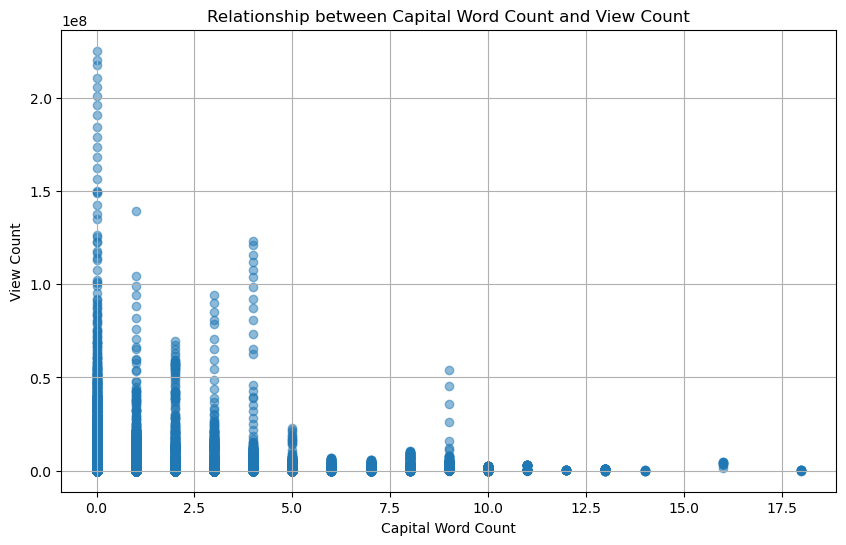

In [117]:
data_file['Capital_Words'] = data_file['Capital_Words'].apply(str)
plt.figure(figsize=(10, 6))
plt.scatter(data_file['Capital_Words'].apply(lambda x: len(eval(x))), data_file['views'], alpha=0.5)
plt.title('Relationship between Capital Word Count and View Count')
plt.xlabel('Capital Word Count')
plt.ylabel('View Count')
plt.grid(True)
plt.show()

In [119]:
data_file.duplicated().values.any()

True

In [120]:
data_file.duplicated().sum()

48

In [211]:
model_data = data_file.drop_duplicates()
model_data.shape

(40901, 24)

In [123]:
model_data.duplicated().values.any()

False

In [159]:
model_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,year,month,day,hour,day_of_week,title_length,title_sentiment,Capital_Words
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,13,17,0,34,0,"['WE', 'WANT', 'TO', 'TALK', 'ABOUT', 'OUR', '..."
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,"One year after the presidential election, John...",2017,11,13,7,0,62,0,['(HBO)']
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,12,19,6,53,0,[]
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,Today we find out if Link is a Nickelback amat...,2017,11,13,11,0,32,-1,[]
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,I know it's been a while since we did this sho...,2017,11,12,18,6,24,0,"['I', 'GOING', 'BALD!?']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,The Cat Who Caught the Laser - Aaron's Animals,2018,5,18,13,4,28,0,[]
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,...,False,,2018,5,18,1,4,26,0,[]
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,I had so much fun transforming Safiyas hair in...,2018,5,18,17,4,84,1,"['I', 'GAVE', 'SAFIYA', 'NYGAARD', 'A', 'PERFE..."
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,How Black Panther Should Have EndedWatch More ...,2018,5,17,17,3,35,-0,[]


In [152]:
model_data.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
year                      0
month                     0
day                       0
hour                      0
day_of_week               0
title_length              0
title_sentiment           0
Capital_Words             0
dtype: int64

In [164]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  int64         
 5   publish_time            40901 non-null  datetime64[ns]
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

In [212]:
model_data['trending_date'] = pd.to_datetime(model_data['trending_date'],format="%y.%d.%m")
model_data['trending_date'] = model_data['trending_date'].dt.tz_localize(None)
model_data['publish_time'] = model_data['publish_time'].dt.tz_localize(None)
model_data['difference_day'] = (model_data['trending_date'] - model_data['publish_time']).dt.days
model_data['comment_rate'] = (model_data['comment_count'] / model_data['views'])*100
model_data['dislike_rate'] = (model_data['dislikes'] / model_data['views'])*100
model_data['dislike_ratio'] = (model_data['dislikes'] / (model_data['dislikes'] + model_data['likes']))*100
model_data = model_data.dropna(subset=['dislike_ratio'])
model_data['weekday_weekend'] = model_data['day_of_week'].apply(lambda x: 0 if x < 5 else 1)
model_data['capital_word']=model_data['Capital_Words'].apply(lambda x: len(eval(x)))
model_data['word_count'] = model_data['tags'].str.split('|').apply(len)



In [213]:
model_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,title_length,title_sentiment,Capital_Words,difference_day,comment_rate,dislike_rate,dislike_ratio,weekday_weekend,capital_word,word_count
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,34,0,"['WE', 'WANT', 'TO', 'TALK', 'ABOUT', 'OUR', '...",0,2,0,5,0,7,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,62,0,['(HBO)'],0,1,0,6,0,1,4
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,53,0,[],1,0,0,4,1,0,23
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,32,-1,[],0,1,0,6,0,0,27
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,24,0,"['I', 'GOING', 'BALD!?']",1,1,0,1,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,28,0,[],26,0,0,4,0,0,14
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,...,26,0,[],26,0,0,1,0,0,1
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,84,1,"['I', 'GAVE', 'SAFIYA', 'NYGAARD', 'A', 'PERFE...",26,0,0,2,0,13,24
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,35,-0,[],27,0,0,1,0,0,22


In [410]:

model_data[['video_id','category_id','views','likes','dislikes','comment_count','title_length','difference_day',
                  'comment_rate','dislike_rate','dislike_ratio','weekday_weekend','capital_word','word_count']].tail(300
                                                                                                                    )

,video_id,category_id,views,likes,dislikes,comment_count,title_length,difference_day,comment_rate,dislike_rate,dislike_ratio,weekday_weekend,capital_word,word_count
40649,LfeEu4_vtfQ,22,5504416,192742,4106,13470,26,12,0,0,2,0,0,17
40650,8JnfIa84TnU,10,19218813,429807,9873,13278,54,12,0,0,2,0,0,21
40651,2nVPFdqejD0,23,4378781,102608,23059,10023,57,12,0,1,18,0,0,26
40652,36DAv_m8Mlw,10,869724,30262,540,1214,48,11,0,0,2,0,1,5
40653,vL2-H_0V7nw,23,1411892,40889,4991,4782,33,12,0,0,11,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,15,1685609,38160,1385,2657,28,26,0,0,4,0,0,14
40945,1h7KV2sjUWY,22,1064798,60008,382,3936,26,26,0,0,1,0,0,1
40946,D6Oy4LfoqsU,24,1066451,48068,1032,3992,84,26,0,0,2,0,13,24
40947,oV0zkMe1K8s,1,5660813,192957,2846,13088,35,27,0,0,1,0,0,22


In [416]:
#prediction
df_unclean=model_data[['video_id','category_id','views','likes','dislikes','comment_count','title_length','difference_day',
                  'comment_rate','dislike_rate','dislike_ratio','weekday_weekend','capital_word','word_count']]

columns_to_scale = ['views','likes','dislikes','comment_count','title_length','difference_day',
                  'comment_rate','dislike_rate','dislike_ratio','weekday_weekend','capital_word','word_count']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_unclean[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

df_clean=pd.concat([df_unclean[['video_id','category_id']], scaled_df], axis=1, ignore_index=False)
df_clean=df_clean.dropna()
#whether to standardize response??
#why na? 

In [417]:
df_clean.describe()

,category_id,views,likes,dislikes,comment_count,title_length,difference_day,comment_rate,dislike_rate,dislike_ratio,weekday_weekend,capital_word,word_count
count,40513,40513,40513,40513,40513,40513,40513,40513,40513,40513,40513,40513,40513
mean,20,0,0,0,0,0,0,0,-0,-0,-0,-0,0
std,8,1,1,1,1,1,1,1,1,1,1,1,1
min,1,-0,-0,-0,-0,-2,-0,-1,-0,-1,-0,-1,-2
25%,17,-0,-0,-0,-0,-1,-0,-0,-0,-0,-0,-1,-1
50%,24,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-1,-0
75%,25,-0,-0,-0,-0,1,-0,0,-0,0,-0,-0,1
max,43,30,24,57,36,3,29,20,50,9,2,9,4


In [418]:
df_clean.columns

Index(['video_id', 'category_id', 'views', 'likes', 'dislikes',
       'comment_count', 'title_length', 'difference_day', 'comment_rate',
       'dislike_rate', 'dislike_ratio', 'weekday_weekend', 'capital_word',
       'word_count'],
      dtype='object')

In [419]:
#predict like 
#linear regression
X_l = df_clean[['category_id', 'views', 'dislikes',
       'comment_count', 'title_length', 'difference_day', 'comment_rate',
       'dislike_rate', 'dislike_ratio', 'weekday_weekend', 'capital_word',
       'word_count']]
y_l = df_clean['likes']
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size = 0.3, random_state = 42)

lr_model = LinearRegression()
lr_model.fit(X_l_train, y_l_train)
y_pred_lr = lr_model.predict(X_l_test)
r2_lr=r2_score(y_l_test, y_pred_lr)
mae_lr=mean_absolute_error(y_l_test, y_pred_lr)
rmse_lr=mean_squared_error(y_l_test, y_pred_lr, squared=False)
print("MAE: %.2f" % mae_lr)
print("RMSE: %.2f" % rmse_lr)
print("R2 score: %.2f" % r2_lr)
print(lr_model.intercept_)

MAE: 0.13
RMSE: 0.34
R2 score: 0.89
0.0005507596437252563


In [420]:
train_lr = lr_model.score(X_l_train, y_l_train)
test_lr = lr_model.score(X_l_test, y_l_test)
print('Train Accuracy:', train_lr)
print('Test Accuracy:', test_lr)


Train Accuracy: 0.8946672693022791
Test Accuracy: 0.8899490409604068


In [ ]:
#whether will be better to do log transform to predict likes 

In [421]:
#decision tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_l_train, y_l_train)
y_pred_dt = dt_model.predict(X_l_test)
r2_dt=r2_score(y_l_test, y_pred_dt)
mae_dt=mean_absolute_error(y_l_test, y_pred_dt)
rmse_dt=mean_squared_error(y_l_test, y_pred_dt, squared=False)
print("MAE: %.2f" % mae_dt)
print("RMSE: %.2f" % rmse_dt)
print("R2 score: %.2f" % r2_dt)

MAE: 0.02
RMSE: 0.17
R2 score: 0.97


In [422]:
train_dt = dt_model.score(X_l_train, y_l_train)
test_dt = dt_model.score(X_l_test, y_l_test)
print('Train Accuracy:', train_dt)
print('Test Accuracy:', test_dt)


Train Accuracy: 1.0
Test Accuracy: 0.9726051754517516


In [368]:
#random forest
rf_model = RandomForestRegressor()
rf_model.fit(X_l_train, y_l_train)
y_pred_rf = rf_model.predict(X_l_test)
r2_rf=r2_score(y_l_test, y_pred_rf)
mae_rf=mean_absolute_error(y_l_test, y_pred_rf)
rmse_rf=mean_squared_error(y_l_test, y_pred_rf, squared=False)
print("MAE: %.2f" % mae_rf)
print("RMSE: %.2f" % rmse_rf)
print("R2 score: %.2f" % r2_rf)


MAE: 0.02
RMSE: 0.11
R2 score: 0.99


In [369]:
train_rf = rf_model.score(X_l_train, y_l_train)
test_rf = rf_model.score(X_l_test, y_l_test)
print('Train Accuracy:', train_rf)
print('Test Accuracy:', test_rf)

Train Accuracy: 0.9988823439343709
Test Accuracy: 0.9893619934306332


In [348]:
#optimazation
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_opt = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model_opt, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_l_train, y_l_train)
best_rf_model = grid_search_rf.best_estimator_


In [ ]:
predictions_rf = best_rf_model.predict(X_l_test)

In [384]:
r2_rf_opt=r2_score(y_l_test, predictions_rf )
mae_rf_opt=mean_absolute_error(y_l_test, predictions_rf )
rmse_rf_opt=mean_squared_error(y_l_test, predictions_rf , squared=False)
print("MAE: %.2f" % mae_rf_opt)
print("RMSE: %.2f" % rmse_rf_opt)
print("R2 score: %.2f" % r2_rf_opt)

MAE: 0.02
RMSE: 0.10
R2 score: 0.99


In [385]:
train_rf_opt = best_rf_model.score(X_l_train, y_l_train)
test_rf_opt = best_rf_model.score(X_l_test, y_l_test)
print('Train Accuracy:', train_rf_opt)
print('Test Accuracy:', test_rf_opt)

Train Accuracy: 0.9989317607476013
Test Accuracy: 0.9903650844511612


In [376]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# param_grid = [
# {'n_estimators': [10, 25], 'max_features': [5, 10], 
#  'max_depth': [10, 50, None], 'bootstrap': [True, False]}
# ]

# rf_tuned = RandomForestRegressor()

# rf_tuned_model = GridSearchCV(rf_tuned, param_grid, cv=10, scoring='neg_root_mean_squared_error')
# rf_tuned_model.fit(X_l_train, y_l_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_root_mean_squared_error')

In [378]:
# y_pred_rf_tuned = rf_tuned_model.predict(X_l_test)

In [382]:
# best_params = rf_tuned_model.best_estimator_.get_params()
# best_params

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [383]:
# r2_rf_tune=r2_score(y_l_test, y_pred_rf_tuned  )
# mae_rf_tune=mean_absolute_error(y_l_test, y_pred_rf_tuned  )
# rmse_rf_tune=mean_squared_error(y_l_test, y_pred_rf_tuned  , squared=False)
# print("MAE: %.2f" % mae_rf_tune)
# print("RMSE: %.2f" % rmse_rf_tune)
# print("R2 score: %.2f" % r2_rf_tune)

MAE: 0.01
RMSE: 0.08
R2 score: 0.99


In [356]:
features = ["category_id", "views", "dislikes", "comment_count", "title_length", "difference_day",
            "comment_rate", "dislike_rate", "dislike_ratio", "weekday_weekend", "capital_word", "word_count"]
target = "likes"
feature_importance_rf = best_rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importance_rf})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
feature_importance_rf

,Feature,Importance
3,comment_count,1
1,views,0
8,dislike_ratio,0
11,word_count,0
2,dislikes,0
4,title_length,0
10,capital_word,0
6,comment_rate,0
7,dislike_rate,0
5,difference_day,0


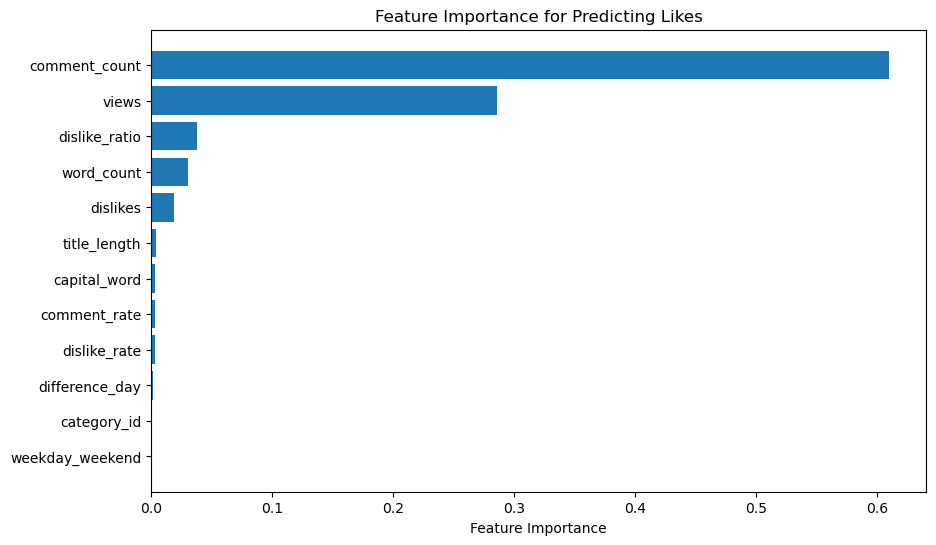

In [377]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Likes')
plt.gca().invert_yaxis()  
plt.show()


In [358]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model_opt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model_opt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
predictions_dt = best_dt_model.predict(X_l_test)

In [359]:
r2_dt_opt=r2_score(y_l_test, predictions_dt )
mae_dt_opt=mean_absolute_error(y_l_test, predictions_dt )
rmse_dt_opt=mean_squared_error(y_l_test, predictions_dt , squared=False)
print("MAE: %.2f" % mae_dt_opt)
print("RMSE: %.2f" % rmse_dt_opt)
print("R2 score: %.2f" % r2_dt_opt)


MAE: 0.02
RMSE: 0.16
R2 score: 0.98


In [372]:
train_dt_opt = best_dt_model.score(X_l_train, y_l_train)
test_dt_opt = best_dt_model.score(X_l_test, y_l_test)
print('Train Accuracy:', train_dt_opt)
print('Test Accuracy:', test_dt_opt)

Train Accuracy: 1.0
Test Accuracy: 0.9768754817416464


In [366]:
ensemble_model = VotingRegressor(estimators=[('rf', best_rf_model), ('dt', best_dt_model)])
ensemble_model.fit(X_train, y_train)
predictions_en=ensemble_model.predict(X_l_test)

In [367]:
r2_en_opt=r2_score(y_l_test, predictions_en )
mae_en_opt=mean_absolute_error(y_l_test, predictions_en )
rmse_en_opt=mean_squared_error(y_l_test, predictions_en , squared=False)
print("MAE: %.2f" % mae_en_opt)
print("RMSE: %.2f" % rmse_en_opt)
print("R2 score: %.2f" % r2_en_opt)


MAE: 0.02
RMSE: 0.12
R2 score: 0.99


In [373]:
train_en = ensemble_model.score(X_l_train, y_l_train)
test_en = ensemble_model.score(X_l_test, y_l_test)
print('Train Accuracy:', train_en)
print('Test Accuracy:', test_en)

Train Accuracy: 0.9997329401869003
Test Accuracy: 0.9870426606284348


In [374]:
model_comparison = {
    'Linear Regression': [mae_lr, rmse_lr, r2_lr,train_lr,test_lr],
    'Decision Tree':[mae_dt, rmse_dt, r2_dt,train_dt,test_dt],
    'Random Forest':[mae_rf, rmse_rf, r2_rf,train_rf,test_rf],
    'Optimized Random Forest':[mae_rf_opt,rmse_rf_opt,r2_rf_opt,train_rf_opt,test_rf_opt],
    'Optimized Decision Tree':[mae_dt_opt,rmse_dt_opt,r2_dt_opt,train_dt_opt,test_dt_opt],
    'Ensemble model':[ mae_en_opt,rmse_en_opt,r2_en_opt,train_en,test_en]}

model_comparison = pd.DataFrame(data = model_comparison, index = ['MAE', 'RMSE', 'R2 Score','Train Accuracy','Test Accuracy'])
model_comparison = model_comparison.applymap('{:.4f}'.format)
model_comparison
#from comparison result, random forest after parameter tuning perform better on r2 score, with lowest MAE and RMAE
#Though decision tree perform 100% accuracy on training, it does not perform well on prediction
#Linear regression appears to be worst among three model

,Linear Regression,Decision Tree,Random Forest,Optimized Random Forest,Optimized Decision Tree,Ensemble model
MAE,0.1338,0.0229,0.0154,0.0152,0.0219,0.0163
RMSE,0.3384,0.1658,0.1052,0.1001,0.1551,0.1161
R2 Score,0.8899,0.9736,0.9894,0.9904,0.9769,0.9870
Train Accuracy,0.8947,1.0000,0.9989,0.9989,1.0000,0.9997
Test Accuracy,0.8899,0.9736,0.9894,0.9904,0.9769,0.9870


In [484]:
#Cluster
cluster_data=model_data[['video_id','category_id','views','likes','dislikes','comment_count','title_length','difference_day',
                  'comment_rate','dislike_rate','dislike_ratio','weekday_weekend','capital_word','word_count']]
cluster_data
#whether to do standardize when clustering?

,video_id,category_id,views,likes,dislikes,comment_count,title_length,difference_day,comment_rate,dislike_rate,dislike_ratio,weekday_weekend,capital_word,word_count
0,2kyS6SvSYSE,22,748374,57527,2966,15954,34,0,2,0,5,0,7,1
1,1ZAPwfrtAFY,24,2418783,97185,6146,12703,62,0,1,0,6,0,1,4
2,5qpjK5DgCt4,23,3191434,146033,5339,8181,53,1,0,0,4,1,0,23
3,puqaWrEC7tY,24,343168,10172,666,2146,32,0,1,0,6,0,0,27
4,d380meD0W0M,24,2095731,132235,1989,17518,24,1,1,0,1,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,15,1685609,38160,1385,2657,28,26,0,0,4,0,0,14
40945,1h7KV2sjUWY,22,1064798,60008,382,3936,26,26,0,0,1,0,0,1
40946,D6Oy4LfoqsU,24,1066451,48068,1032,3992,84,26,0,0,2,0,13,24
40947,oV0zkMe1K8s,1,5660813,192957,2846,13088,35,27,0,0,1,0,0,22


In [501]:
X=cluster_data.iloc[:,1:]
# Set the n_components=2
principal=PCA(n_components=2)
principal.fit(X)
x=principal.transform(X)
 
# Check the dimensions of data after PCA
print(x.shape)

(40731, 2)


In [502]:
PCA_ds = pd.DataFrame(x, columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,40731,0,7378385,-2354037,-2111697,-1672562,-529463,222912066
col2,40731,-0,121023,-2318294,-16954,-11446,476,3096494


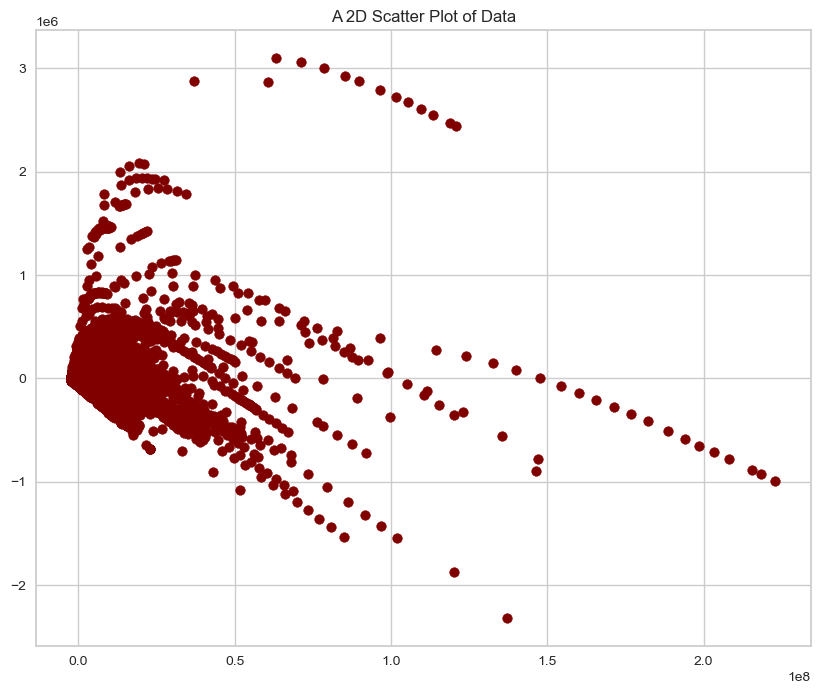

In [491]:
x1 = PCA_ds["col1"]
y1 = PCA_ds["col2"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x1, y1, c="maroon", marker="o")
ax.set_title("A 2D Scatter Plot of Data")
plt.show()


Elbow Method to determine the number of clusters to be formed:


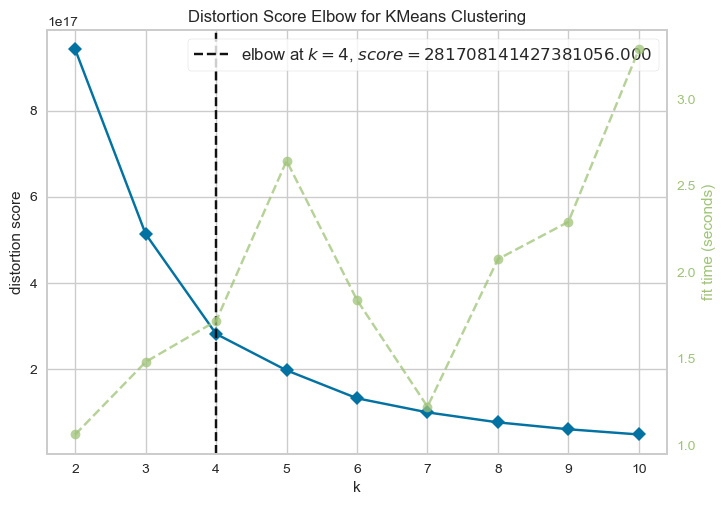

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [493]:
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(x)
Elbow_M.show()

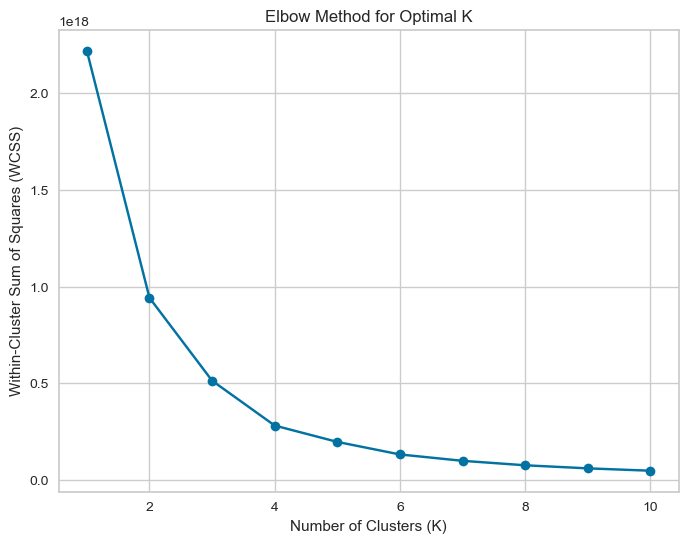

In [494]:
wcss = []
for k in range(1, 11):  # Try different numbers of clusters (e.g., 1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Create an elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()



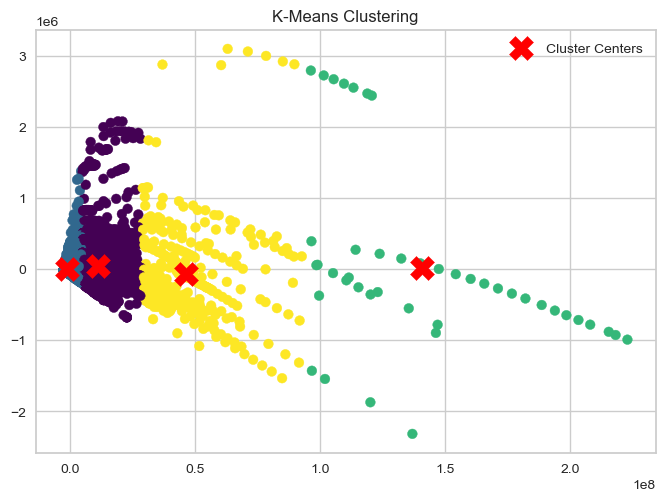

In [516]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(x[:, :2])
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.legend()
plt.title('K-Means Clustering')

plt.show()

In [504]:
cluster_data=model_data
cluster_data['cluster']=cluster_labels_4

In [506]:
cluster_data.describe()

,category_id,views,likes,dislikes,comment_count,year,month,day,hour,day_of_week,title_length,title_sentiment,difference_day,comment_rate,dislike_rate,dislike_ratio,weekday_weekend,capital_word,word_count,cluster
count,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731,40731
mean,20,2353418,74582,3727,8482,2018,5,16,14,3,49,0,16,0,0,7,0,1,20,1
std,8,7375733,229427,29106,37526,1,4,8,6,2,20,0,146,1,0,10,0,2,12,0
min,1,549,0,0,0,2006,1,1,0,0,3,-1,-1,0,0,0,0,0,1,0
25%,17,242800,5516,206,620,2017,2,9,10,1,34,0,2,0,0,2,0,0,10,1
50%,24,681439,18249,635,1866,2018,4,16,15,3,46,0,4,0,0,3,0,0,19,1
75%,25,1823962,55680,1948,5785,2018,11,23,18,4,61,0,8,1,0,7,0,1,29,1
max,43,225211923,5613827,1674420,1361580,2018,12,31,23,6,100,1,4214,12,19,100,1,18,69,3


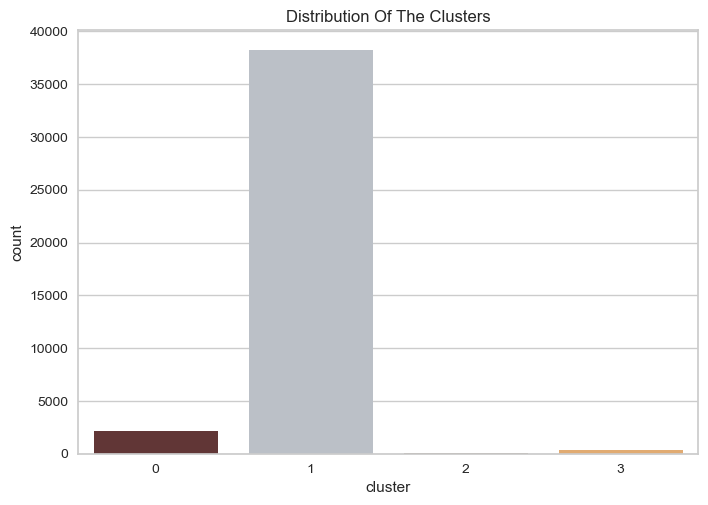

In [508]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=cluster_data['cluster'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

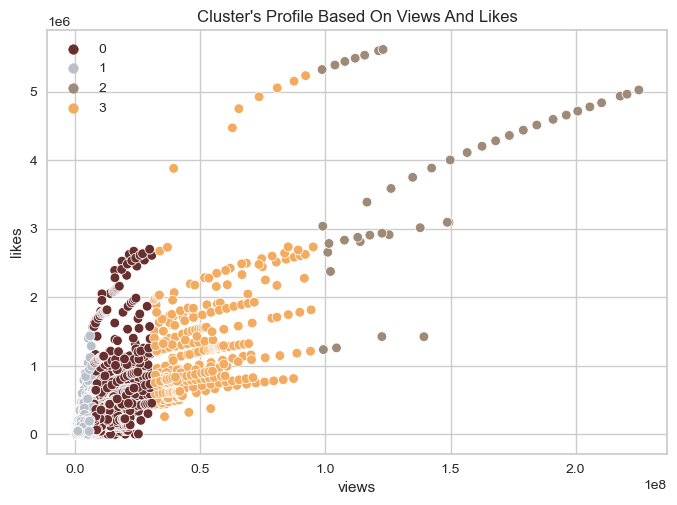

In [515]:
pl = sns.scatterplot(data = cluster_data,x=cluster_data["views"], y=cluster_data["likes"],hue=cluster_data['cluster'], palette= pal)
pl.set_title("Cluster's Profile Based On Views And Likes")
plt.legend()
plt.show()
#1 cluster to be low views and low likes videos
#0 cluster to be low views and high likes videos 
#3 cluster to be high views and low likes videos
#2 cluster to be high views and high likes videos

<Axes: xlabel='category_id', ylabel='count'>

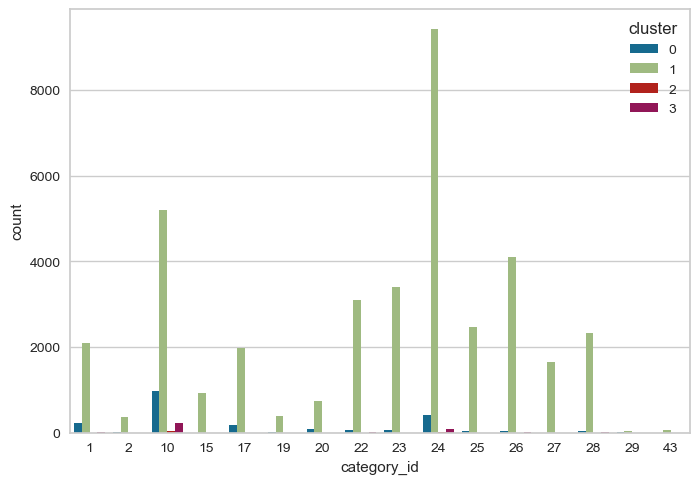

In [514]:
sns.countplot(x='category_id', hue='cluster', data=cluster_data)


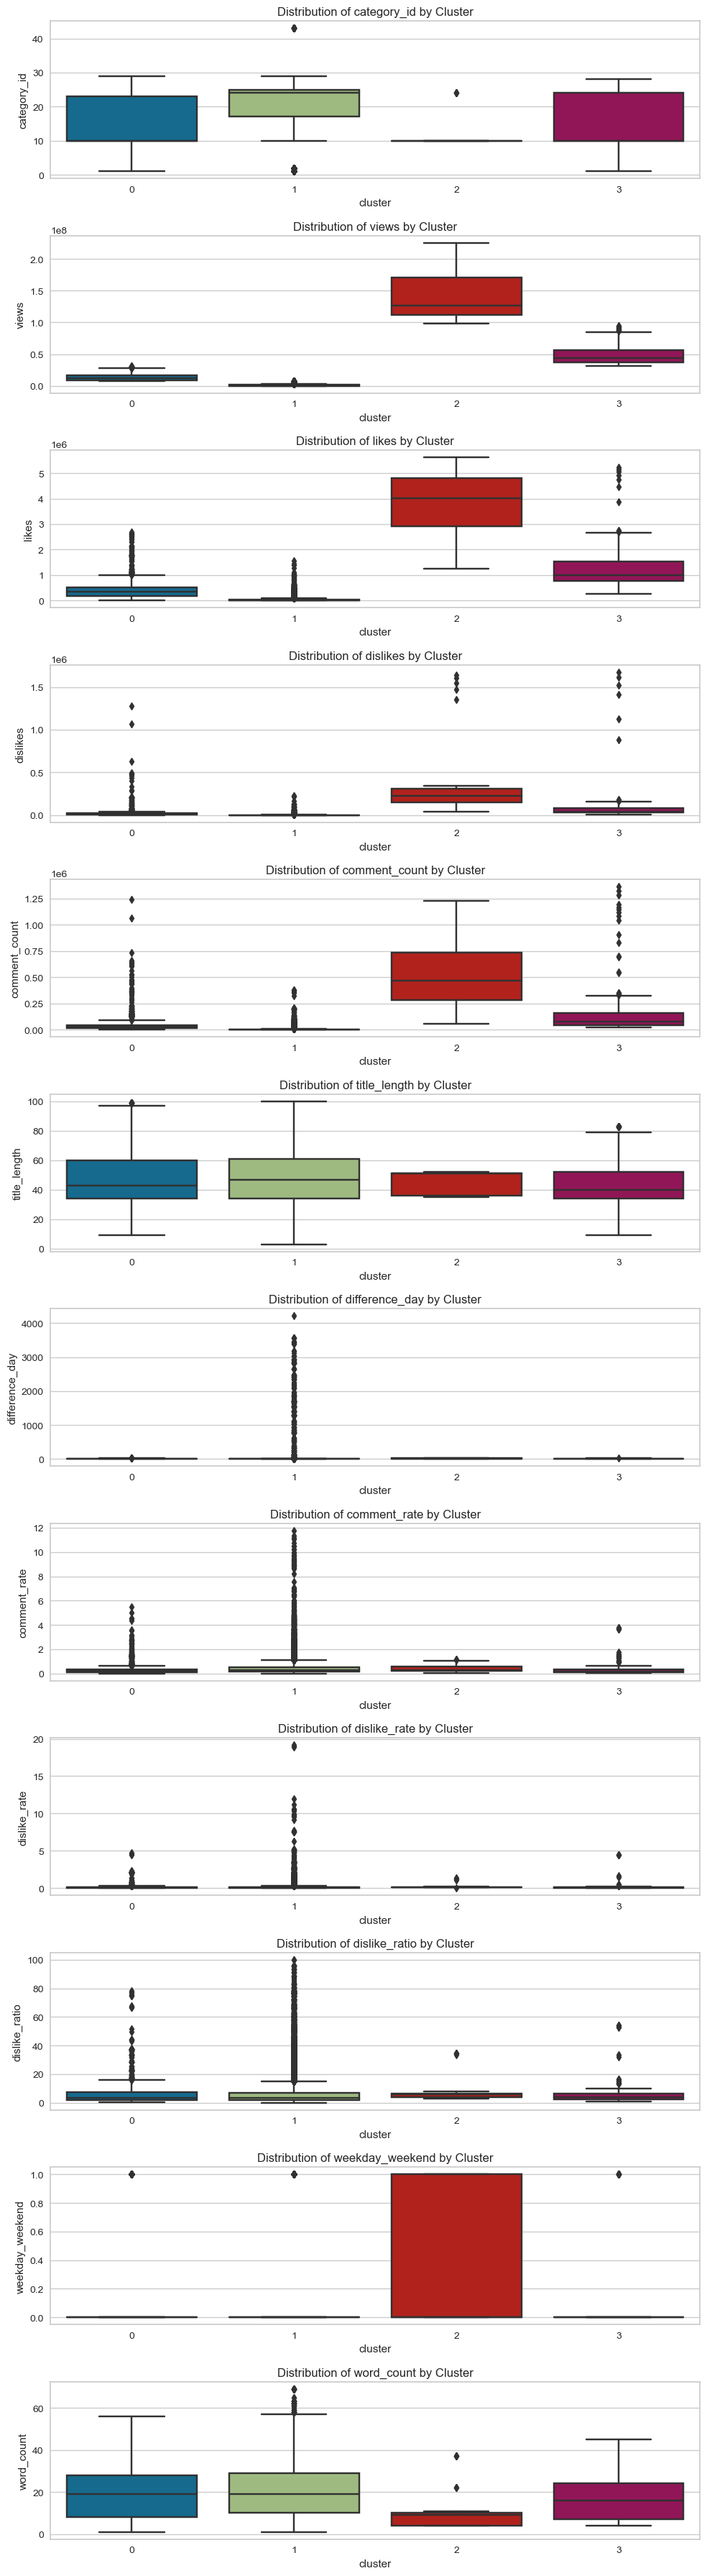

In [519]:

features = ['category_id', 'views', 'likes', 'dislikes', 'comment_count',
            'title_length',  'difference_day',
            'comment_rate', 'dislike_rate', 'dislike_ratio', 'weekday_weekend',  'word_count']

n_features = len(features)
fig, axes = plt.subplots(n_features, 1, figsize=(10, n_features * 3))

# Visualize each feature by cluster
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x='cluster', y=feature, data=cluster_data, ax=ax)
    ax.set_title(f'Distribution of {feature} by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
#as observed from previous data, cluster 2 has high views and high likes, still comment count,
#but it got lowest capital word in title. Cluster 2's video mostly belongs to chanel 10 and posted at weekend
#cluster 1 with lowest views and likes, it has a spread day difference between posted and being trending list
#cluster 0 with second low views and likes 

In [536]:
#classification: use text to classify into different category
classification_data=data_file[['video_id','title','channel_title','category_name','tags','description']]
classification_data

,video_id,title,channel_title,category_name,tags,description
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...","One year after the presidential election, John..."
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...
...,...,...,...,...,...,...
40944,BZt0qjTWNhw,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,True Facts : Ant Mutualism,zefrank1,People & Blogs,[none],
40946,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,I gave safiya nygaard a perfect hair makeover ...,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",How Black Panther Should Have EndedWatch More ...


In [541]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load your video dataset

# Data Preprocessing
# Remove special characters, numbers, and extra whitespaces from text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

classification_data['title'] = classification_data['title'].apply(clean_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(classification_data['title'], classification_data['category_name'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('english'))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a text classification model (Multinomial Naive Bayes is a common choice)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.82
                       precision    recall  f1-score   support

     Autos & Vehicles       1.00      0.33      0.50        57
               Comedy       0.86      0.71      0.78       691
            Education       0.95      0.68      0.79       303
        Entertainment       0.70      0.91      0.79      2011
     Film & Animation       0.92      0.67      0.78       491
               Gaming       0.99      0.72      0.83       161
        Howto & Style       0.81      0.86      0.84       830
                Music       0.84      0.95      0.89      1300
      News & Politics       0.89      0.81      0.85       502
Nonprofits & Activism       0.00      0.00      0.00        15
       People & Blogs       0.84      0.60      0.70       650
       Pets & Animals       0.98      0.69      0.81       186
 Science & Technology       0.88      0.80      0.84       487
                Shows       1.00      0.29      0.44         7
               Sports       0.89      0

In [543]:
from sklearn.svm import SVC
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('english'))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM model for text classification
svm_model = SVC(kernel='linear', C=1.0, probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.95
                       precision    recall  f1-score   support

     Autos & Vehicles       0.90      0.93      0.91        57
               Comedy       0.94      0.92      0.93       691
            Education       0.97      0.93      0.95       303
        Entertainment       0.91      0.96      0.93      2011
     Film & Animation       0.98      0.91      0.94       491
               Gaming       1.00      0.96      0.98       161
        Howto & Style       0.97      0.96      0.96       830
                Music       0.96      0.97      0.97      1300
      News & Politics       0.96      0.94      0.95       502
Nonprofits & Activism       1.00      0.73      0.85        15
       People & Blogs       0.94      0.90      0.92       650
       Pets & Animals       0.97      0.94      0.95       186
 Science & Technology       0.96      0.95      0.96       487
                Shows       1.00      1.00      1.00         7
               Sports       0.98      0